# TinyMS MobileNetV2 Tutorial

In this tutorial, starting a MobileNetV2 inference server and making predictions using TinyMS API will be demonstrated. 

## Prerequisite
 - Ubuntu: `18.04`
 - Python: `3.7.x`
 - Flask: `1.1.2`
 - MindSpore: `CPU-1.1.1`
 - TinyMS: `0.1.0`
 - numpy: `1.17.5`
 - opencv-python: `4.5.1.48`
 - Pillow: `8.1.0`
 - pip: `21.0.1`
 - requests: `2.18.4`
 
## Introduction

TinyMS is a high-level API which is designed for amateur of deep learning. It minimizes the number of actions of users required to construct, train, evaluate and serve a model. TinyMS also provides tutorials and documentations for developers. 

In this tutorial, the ckpt file will be provided since training MobileNetV2 on CPU is time consuming, so there are four steps to start a server and making predicts: `get the ckpt files`, `define servable json`, `start the server` and `making predicts` in which the server will be started in a subprocess.

In [1]:
import os
import json
from PIL import Image
from tinyms.serving import start_server, predict, list_servables, shutdown, server_started

[WARNING] ME(24688:140245943678784,MainProcess):2021-03-16-16:57:40.650.083 [mindspore/ops/operations/array_ops.py:2302] WARN_DEPRECATED: The usage of Pack is deprecated. Please use Stack.


## Steps

### 1. Get the ckpt file

In this tutorial, we provide a MobileNetV2 checkpoint file which is trained with [cifar10](http://www.cs.toronto.edu/~kriz/cifar.html) dataset. This ckpt file is required for the backend to run the prediction. We recommend downloading our pretrained checkpoint file, click [HERE](https://ascend-tutorials.obs.cn-north-4.myhuaweicloud.com/ckpt_files/cifar10/mobilenetv2.ckpt) to download MobileNetV2 ckpt file and save this file to `/etc/tinyms/serving/mobilenetv2/mobilenetv2.ckpt`.

Or run the following code to download and store the ckpt file:

In [2]:
mobilenetv2_ckpt_folder = '/etc/tinyms/serving/mobilenetv2'
mobilenetv2_ckpt_path = '/etc/tinyms/serving/mobilenetv2/mobilenetv2.ckpt'

if not os.path.exists(mobilenetv2_ckpt_folder):
    !mkdir -p  /etc/tinyms/serving/mobilenetv2
    !wget -P /etc/tinyms/serving/mobilenetv2 https://ascend-tutorials.obs.cn-north-4.myhuaweicloud.com/ckpt_files/cifar10/mobilenetv2.ckpt
else:
    print('mobilenetv2 ckpt folder already exists')
    if not os.path.exists(mobilenetv2_ckpt_path):
        !wget -P /etc/tinyms/serving/mobilenetv2 https://ascend-tutorials.obs.cn-north-4.myhuaweicloud.com/ckpt_files/cifar10/mobilenetv2.ckpt
    else:
        print('mobilenetv2 ckpt file already exists')

mobilenetv2 ckpt folder already exists
--2021-03-16 16:57:44--  https://ascend-tutorials.obs.cn-north-4.myhuaweicloud.com/ckpt_files/cifar10/mobilenetv2.ckpt
Resolving ascend-tutorials.obs.cn-north-4.myhuaweicloud.com (ascend-tutorials.obs.cn-north-4.myhuaweicloud.com)... 49.4.112.90, 49.4.112.113, 49.4.112.5, ...
Connecting to ascend-tutorials.obs.cn-north-4.myhuaweicloud.com (ascend-tutorials.obs.cn-north-4.myhuaweicloud.com)|49.4.112.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18509001 (18M) [binary/octet-stream]
Saving to: ‘/etc/tinyms/serving/mobilenetv2/mobilenetv2.ckpt’

mobilenetv2.ckpt    100%[===================>]  17.65M  28.2MB/s    in 0.6s    

2021-03-16 16:57:45 (28.2 MB/s) - ‘/etc/tinyms/serving/mobilenetv2/mobilenetv2.ckpt’ saved [18509001/18509001]



### 2. Define servable.json

Define the MobileNetV2 servable json file for model name, format and number of classes for later use.

In [3]:
servable_json = [{'name': 'mobilenetv2', 
                  'description': 'This servable hosts a mobilenetv2 model predicting 10 classes of objects', 
                  'model': {
                      "name": "mobilenetv2", 
                      "format": "ckpt", 
                      "class_num": 10}}]
os.chdir("/etc/tinyms/serving")
json_data = json.dumps(servable_json, indent=4)

with open('servable.json', 'w') as json_file:
    json_file.write(json_data)

### 3. Start server

#### 3.1 Introduction
TinyMS Serving is a C/S(client/server) structure. There is a server and client. TinyMS using [Flask](https://flask.palletsprojects.com/en/1.1.x/) which is a micro web framework written in python as the C/S communication tool. In order to serve a model, user must start server first. If successfully started, the server will be run in a subprocess and listening to POST requests from 127.0.0.1 port 5000 sent by client and handle the requests using MindSpore backend which will construct the model, run the prediction and send the result back to the client.  

#### 3.2 start server
Run the following code block to start the server:

In [4]:
start_server()

Server starts at host 127.0.0.1, port 5000


### 4. Make predictions

#### 4.1 Upload the pic

A picture is required to be the input. This ckpt requires a picture containing the following objects:
```
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
```
Click [airplane](https://ascend-tutorials.obs.cn-north-4.myhuaweicloud.com/tinyms-test-pics/objects/airplane.jpg) to download the picture used in this tutorial. Upload the pic, if using terminal, either `scp` or `wget` will do, if running in Jupyter, click `Upload` button at the top right and select the picture. 

Save the picture at the root folder, rename to `airplane.jpg`(or any name you want).

### Or run the following code to download the picture used in this tutorial

In [5]:
# download the airplane pic
if not os.path.exists('/root/airplane.jpg'):
    !wget -P /root/ https://ascend-tutorials.obs.cn-north-4.myhuaweicloud.com/tinyms-test-pics/objects/airplane.jpg
else:
    print('airplane.jpg already exists')

--2021-03-16 16:58:06--  https://ascend-tutorials.obs.cn-north-4.myhuaweicloud.com/tinyms-test-pics/objects/airplane.jpg
Resolving ascend-tutorials.obs.cn-north-4.myhuaweicloud.com (ascend-tutorials.obs.cn-north-4.myhuaweicloud.com)... 121.36.121.44, 49.4.112.5, 49.4.112.113, ...
Connecting to ascend-tutorials.obs.cn-north-4.myhuaweicloud.com (ascend-tutorials.obs.cn-north-4.myhuaweicloud.com)|121.36.121.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151188 (148K) [image/jpeg]
Saving to: ‘/root/airplane.jpg’

airplane.jpg        100%[===================>] 147.64K   884KB/s    in 0.2s    

2021-03-16 16:58:07 (884 KB/s) - ‘/root/airplane.jpg’ saved [151188/151188]



####  4.2 List servables

Now, we can use `list_servables` function to check what model is servable right now.

In [6]:
list_servables()

[{'description': 'This servable hosts a mobilenetv2 model predicting 10 classes of objects',
  'model': {'class_num': 10, 'format': 'ckpt', 'name': 'mobilenetv2'},
  'name': 'mobilenetv2'}]

If the output `description` shows it is a `MobileNetV2` model, then we can continue to next step to send our request.

#### 4.3 Sending request and get the result

Run `predict` function to send the request, select between `TOP1_CLASS` and `TOP5_CLASS` to check the output:

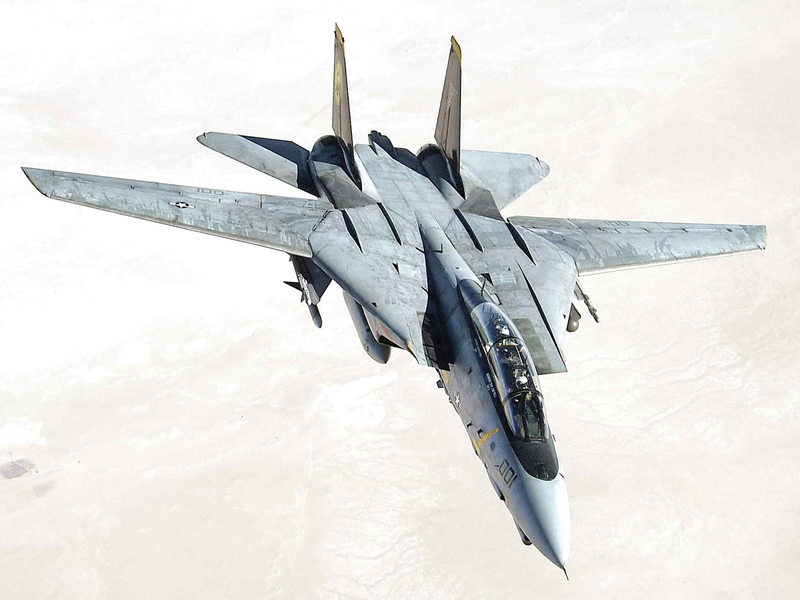

TOP1: airplane, score: 0.22268821299076080322


In [7]:
# set image path and output strategy(TOP1_CLASS or TOP5_CLASS)
image_path = "/root/airplane.jpg"
strategy = "TOP1_CLASS"

# predict(image_path, servable_name, dataset_name, strategy)
if server_started() is True:
    display(Image.open(image_path).resize((800, 600), Image.ANTIALIAS))
    print(predict(image_path, 'mobilenetv2', 'cifar10', strategy))
else:
    print("Server not started")

## Check output

If user can see output similar to this:
```
TOP1: airplane, score: 0.22268821299076080322
```
that means the prediction result is returned and the inference is completed.

 ## Shutdown server
 
To restart and try another checkpoint file, click `Kernel` at the top, then `Restart & Clear Output`, replace the `servable_json` code and `predict()` function
 
Run the following code to shutdown Flask server:

In [8]:
shutdown()

'Server shutting down...'